- Setup Environment, Compile C++ Codes, and Import Dependencies

In [1]:
# Run the compiler
!python compile.py

running build_ext
building 'image_processing' extension
"D:\Visual Studio\VC\Tools\MSVC\14.40.33807\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD -Ic:\Users\23842\.conda\envs\data\Lib\site-packages\pybind11\include -Iscripts -Ic:\Users\23842\.conda\envs\data\include -Ic:\Users\23842\.conda\envs\data\Include "-ID:\Visual Studio\VC\Tools\MSVC\14.40.33807\include" "-ID:\Visual Studio\VC\Auxiliary\VS\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.22621.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\um" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\shared" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\winrt" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.22621.0\\cppwinrt" "-IC:\Program Files (x86)\Windows Kits\NETFXSDK\4.8\include\um" /EHsc /Tpscripts\bind.cpp /Fobuild\temp.win-amd64-cpython-312\Release\scripts\bind.obj
bind.cpp
"D:\Visual Studio\VC\Tools\MSVC\14.40.33807\bin\HostX86\x64

In [2]:
# All Imports
from modules import *

- Image Processing

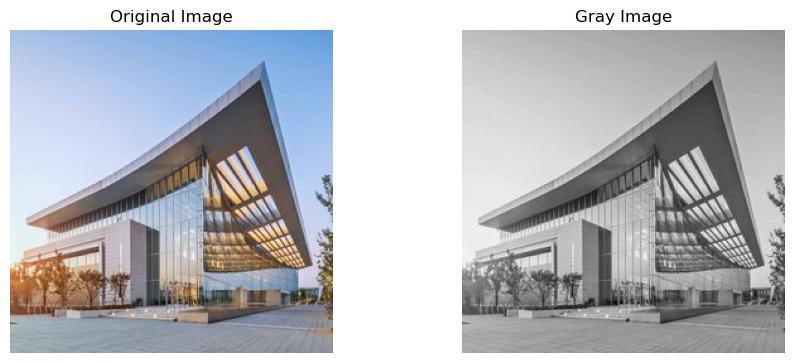

In [3]:
# Gray Scale
AB_img = Image(256, 256, 3)
AB_img.load("images/building2_color.raw")
AB_img_gray = Image.gray_scale(AB_img)

show_images([AB_img, AB_img_gray], ["Original Image", "Gray Image"])

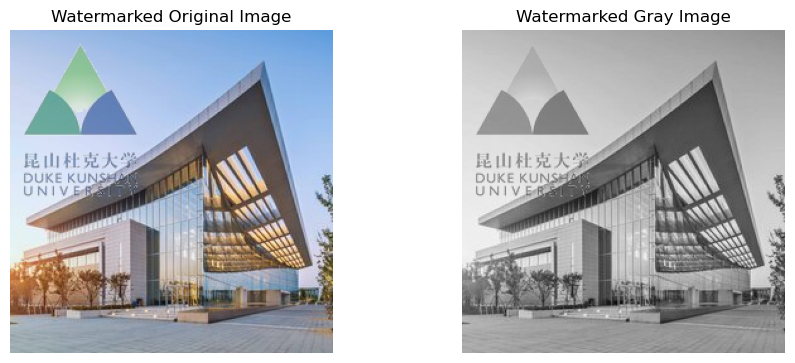

In [4]:
# Watermark
dku_logo = Image(128, 128, 3)
dku_logo.load("images/dku_logo_color.raw")
AB_img_with_logo = Image.water_mark(AB_img, dku_logo, -10, 10, 220, 0.5)

dku_logo_gray = Image(128, 128, 1)
dku_logo_gray.load("images/dku_logo_gray.raw")
watermarked_gray_img = Image.water_mark(AB_img_gray, dku_logo_gray, -10, 10, 220, 0.5)

show_images([AB_img_with_logo, watermarked_gray_img], ["Watermarked Original Image", "Watermarked Gray Image"])

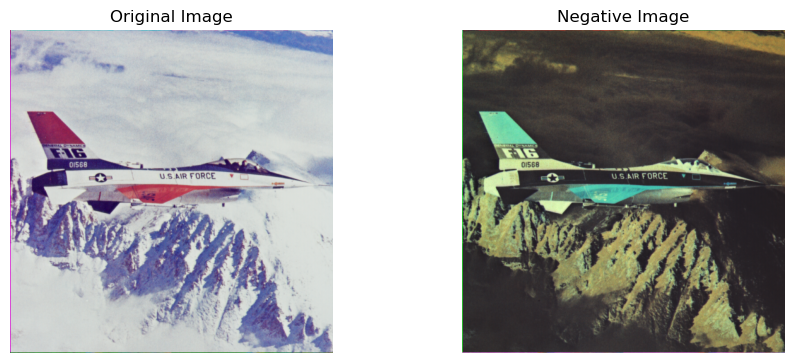

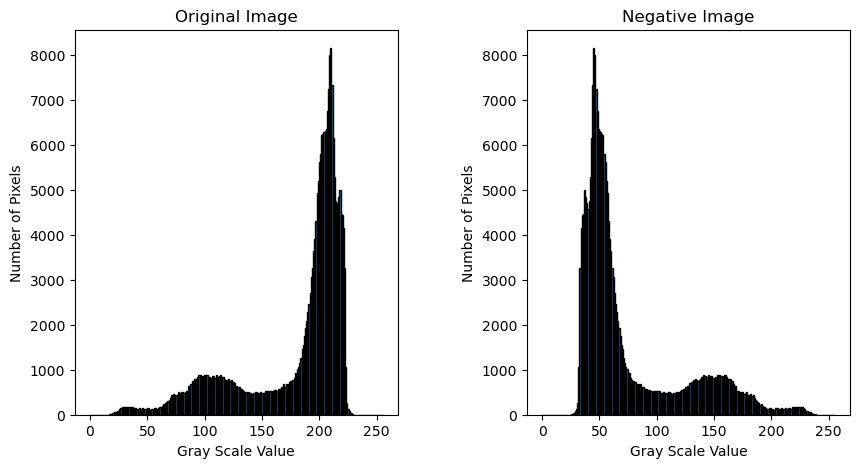

In [5]:
# Negative Image
F_16_img = Image(512, 512, 3)
F_16_img.load("images/F-16.raw")
F_16_img_negative = Image.negative(F_16_img)

F_16_img_gray = Image.gray_scale(F_16_img)
F_16_img_negative_gray = Image.negative(F_16_img_gray)

show_images([F_16_img, F_16_img_negative], ["Original Image", "Negative Image"])
plot_histograms([F_16_img_gray, F_16_img_negative_gray], ["Original Image", "Negative Image"])

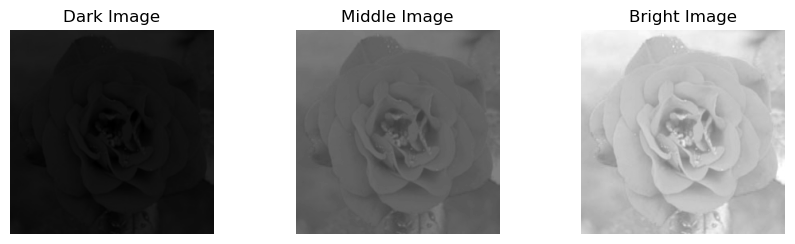

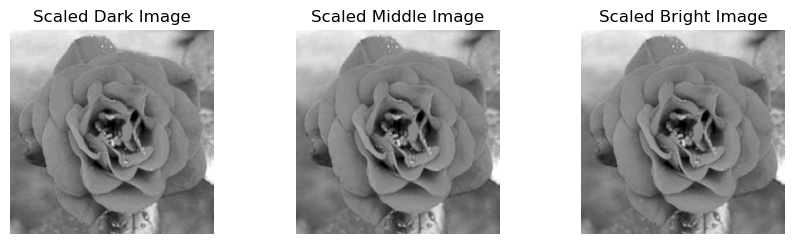

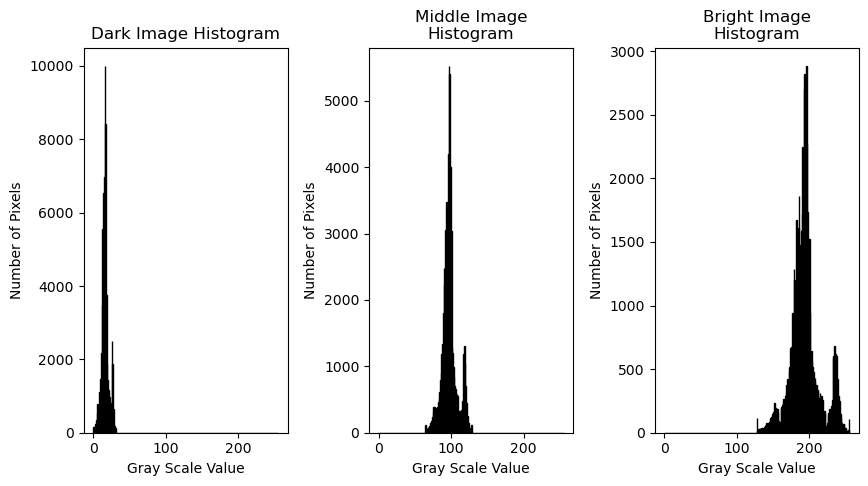

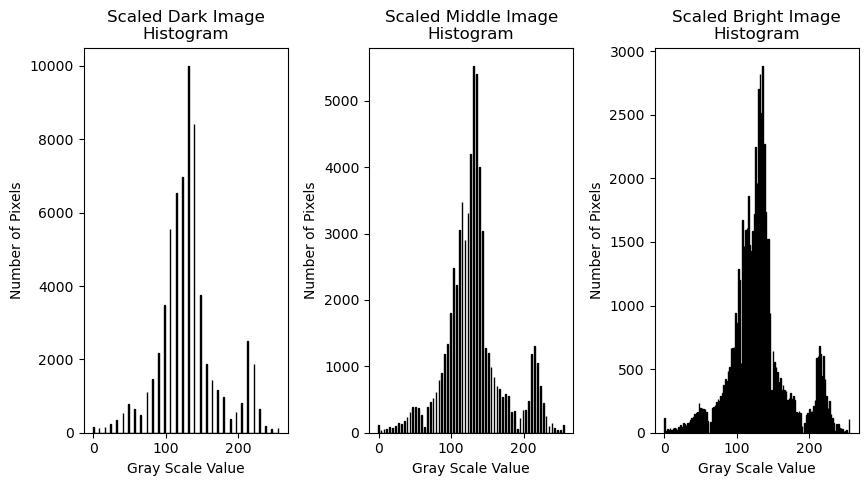

In [6]:
# Image Contrast Enhancement
rose_dark = Image(256, 256, 1)
rose_dark.load("images/rose_dark.raw")
rose_middle = Image(256, 256, 1)
rose_middle.load("images/rose_mid.raw")
rose_bright = Image(256, 256, 1)
rose_bright.load("images/rose_bright.raw")

rose_dark_scaled = Image.linear_scale(rose_dark, 0, 0, 255)
rose_middle_scaled = Image.linear_scale(rose_middle, 0, 0, 255)
rose_bright_scaled = Image.linear_scale(rose_bright, 0, 0, 255)

show_images([rose_dark, rose_middle, rose_bright], ["Dark Image", "Middle Image", "Bright Image"])
show_images([rose_dark_scaled, rose_middle_scaled, rose_bright_scaled], ["Scaled Dark Image", "Scaled Middle Image", "Scaled Bright Image"])
plot_histograms([rose_dark, rose_middle, rose_bright], ["Dark Image Histogram", "Middle Image Histogram", "Bright Image Histogram"])
plot_histograms([rose_dark_scaled, rose_middle_scaled, rose_bright_scaled], ["Scaled Dark Image Histogram", "Scaled Middle Image Histogram", "Scaled Bright Image Histogram"])

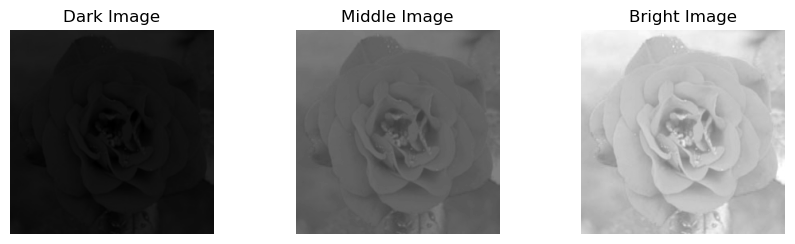

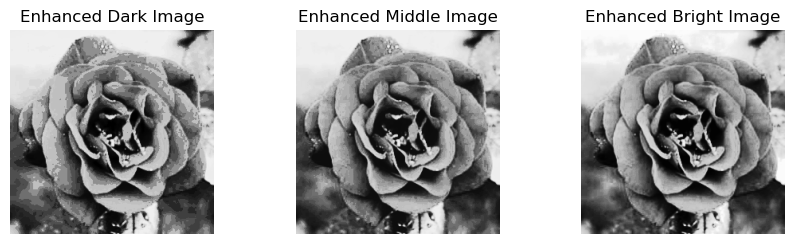

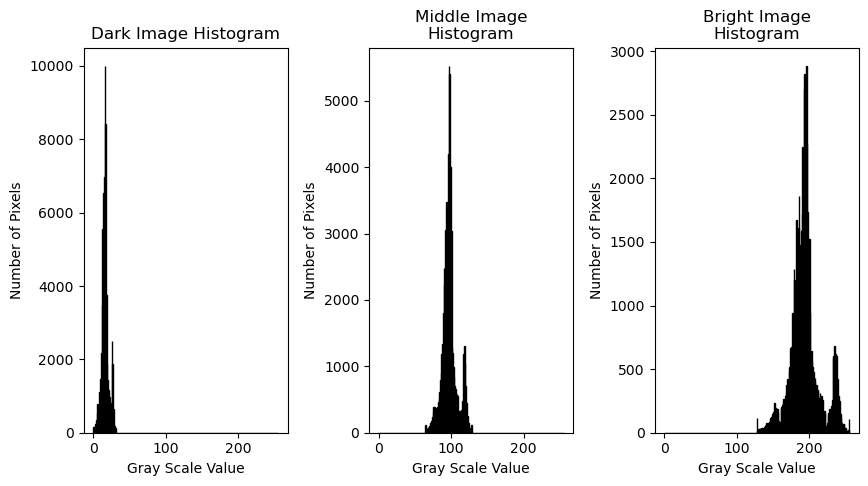

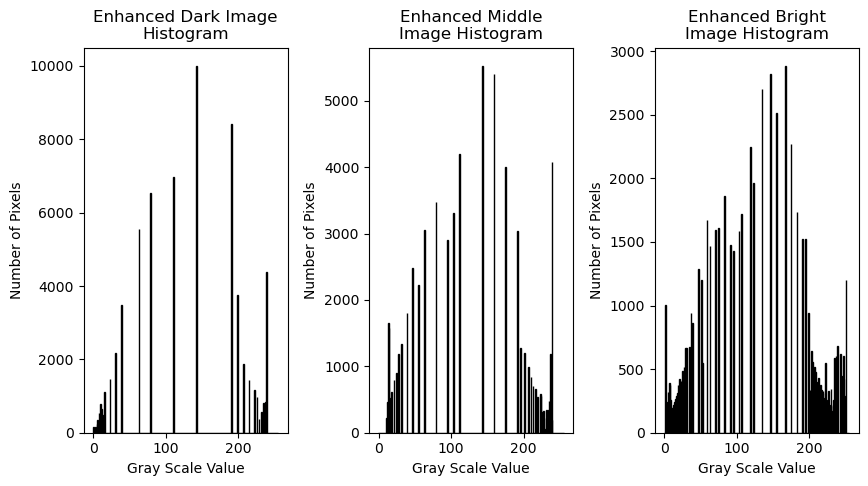

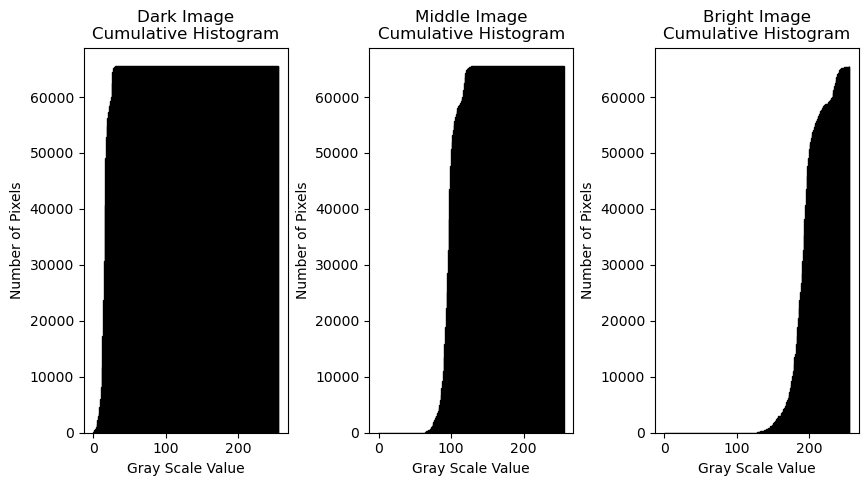

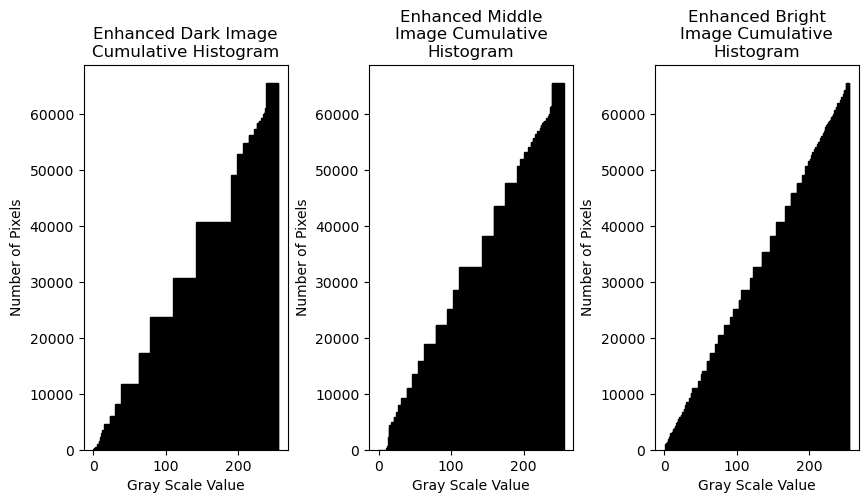

In [7]:
# Histogram Equalization

rose_dark_enhanced = Image.hist_equalize(rose_dark, 0, 16)
rose_middle_enhanced = Image.hist_equalize(rose_middle, 0, 16)
rose_bright_enhanced = Image.hist_equalize(rose_bright, 0, 64)

show_images([rose_dark, rose_middle, rose_bright], ["Dark Image", "Middle Image", "Bright Image"])
show_images([rose_dark_enhanced, rose_middle_enhanced, rose_bright_enhanced], ["Enhanced Dark Image", "Enhanced Middle Image", "Enhanced Bright Image"])
plot_histograms([rose_dark, rose_middle, rose_bright], ["Dark Image Histogram", "Middle Image Histogram", "Bright Image Histogram"])
plot_histograms([rose_dark_enhanced, rose_middle_enhanced, rose_bright_enhanced], ["Enhanced Dark Image Histogram", "Enhanced Middle Image Histogram", "Enhanced Bright Image Histogram"])
plot_histograms([rose_dark, rose_middle, rose_bright], ["Dark Image Cumulative Histogram", "Middle Image Cumulative Histogram", "Bright Image Cumulative Histogram"], cumulative=True)
plot_histograms([rose_dark_enhanced, rose_middle_enhanced, rose_bright_enhanced], ["Enhanced Dark Image Cumulative Histogram", "Enhanced Middle Image Cumulative Histogram", "Enhanced Bright Image Cumulative Histogram"], cumulative=True)

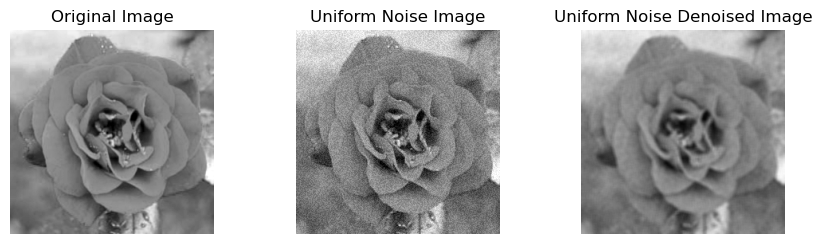

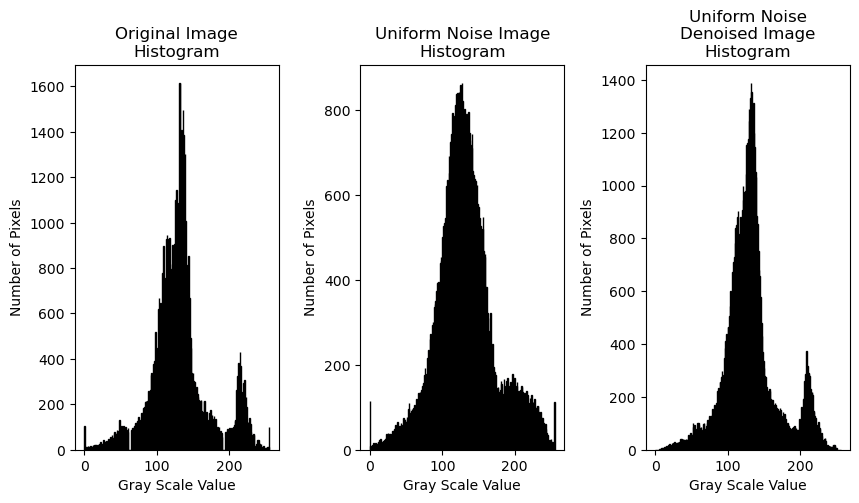

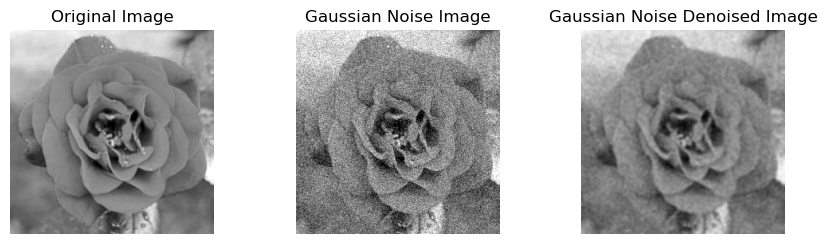

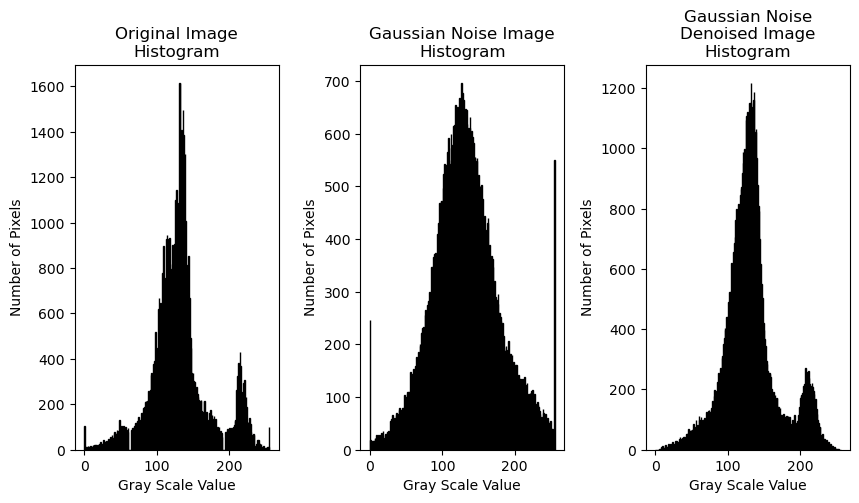

In [8]:
# Gray Scale Noise Removal

rose_original = Image(256, 256, 1)
rose_original.load("images/rose.raw")

rose_uni = Image(256, 256, 1)
rose_uni.load("images/rose_uni.raw")
rose_uni_mean_denoised = Image.mean_denoise(rose_uni, 0, 5)

rose_guassian = Image(256, 256, 1)
rose_guassian.load("images/rose_gau.raw")
rose_guassian_denoised = Image.gaussian_denoise(rose_guassian, 0, 5, 1.5)

show_images([rose_original, rose_uni, rose_uni_mean_denoised], ["Original Image", "Uniform Noise Image", "Uniform Noise Denoised Image"])
plot_histograms([rose_original, rose_uni, rose_uni_mean_denoised], ["Original Image Histogram", "Uniform Noise Image Histogram", "Uniform Noise Denoised Image Histogram"])

show_images([rose_original, rose_guassian, rose_guassian_denoised], ["Original Image", "Gaussian Noise Image", "Gaussian Noise Denoised Image"])
plot_histograms([rose_original, rose_guassian, rose_guassian_denoised], ["Original Image Histogram", "Gaussian Noise Image Histogram", "Gaussian Noise Denoised Image Histogram"])

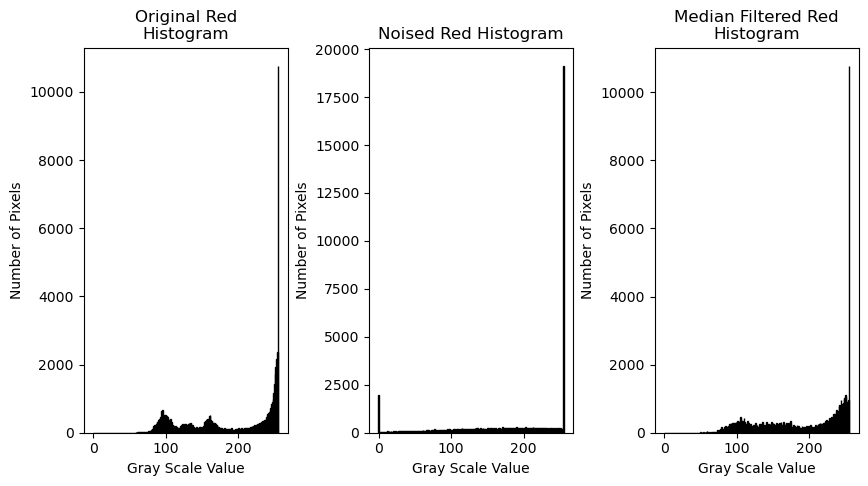

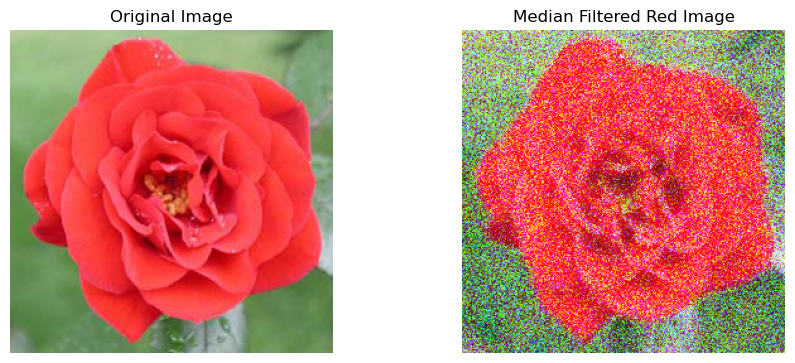

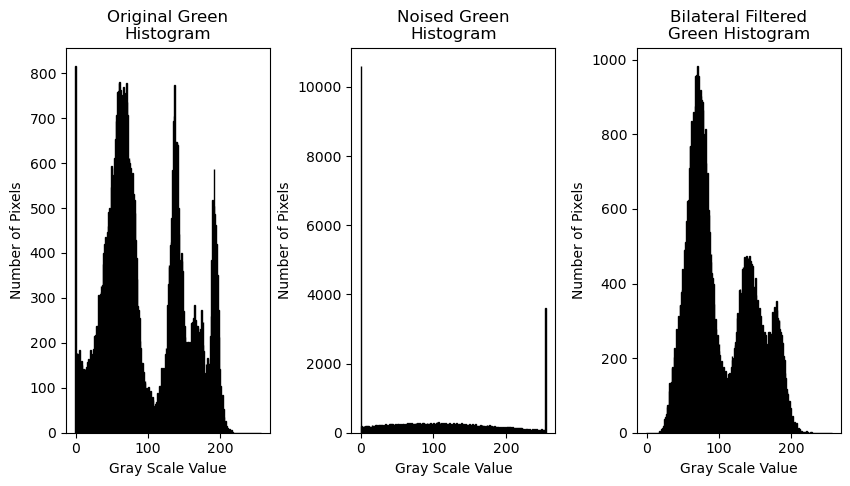

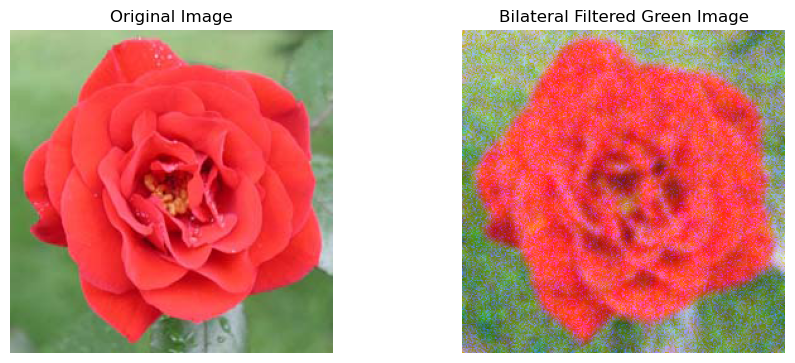

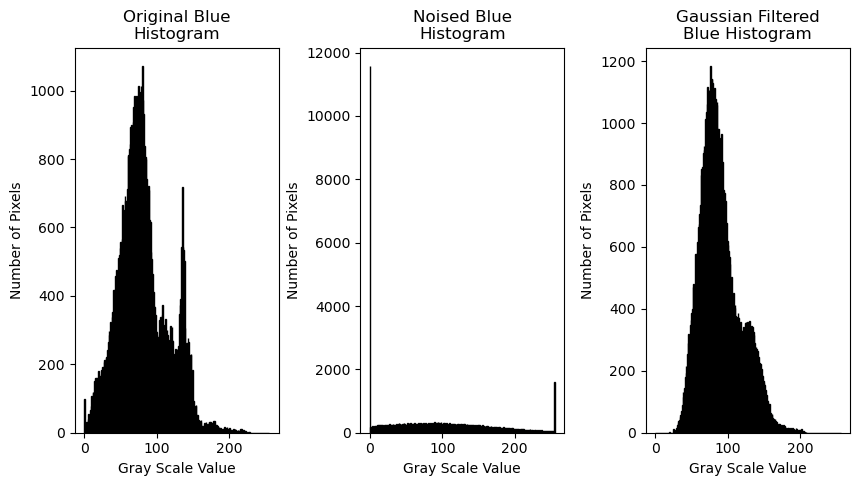

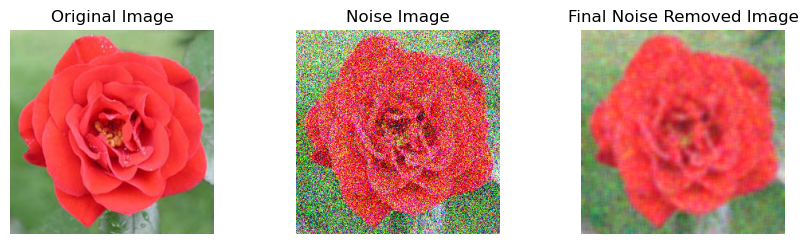

In [9]:
# Colored Noise Removal

rose_color = Image(256, 256, 3)
rose_color.load("images/rose_color.raw")
rose_color_noise = Image(256, 256, 3)
rose_color_noise.load("images/rose_color_noise.raw")

# Red Channel Noise Removal
rose_color_median_red = Image.median_denoise(rose_color_noise, 0, 11, False)
plot_histograms([rose_color, rose_color_noise, rose_color_median_red], ["Original Red Histogram", "Noised Red Histogram", "Median Filtered Red Histogram"])
show_images([rose_color, rose_color_median_red], ["Original Image", "Median Filtered Red Image"])

# Green Channel Noise Removal
rose_color_bilateral_green = Image.bilateral_denoise(rose_color_median_red, 1, 7, 75, 75)
plot_histograms([rose_color, rose_color_noise, rose_color_bilateral_green], ["Original Green Histogram", "Noised Green Histogram", "Bilateral Filtered Green Histogram"], [1, 1, 1])
show_images([rose_color, rose_color_bilateral_green], ["Original Image", "Bilateral Filtered Green Image"])

# Blue Channel Noise Removal
rose_color_gaussian_blue = Image.gaussian_denoise(rose_color_bilateral_green, 2, 7, 4.0)
plot_histograms([rose_color, rose_color_noise, rose_color_gaussian_blue], ["Original Blue Histogram", "Noised Blue Histogram", "Gaussian Filtered Blue Histogram"], [2, 2, 2])
show_images([rose_color, rose_color_noise, rose_color_gaussian_blue], ["Original Image", "Noise Image", "Final Noise Removed Image"])